<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/LeenuMathew_Week11_CaseStudy_PredModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Prediction models on Iris Dataset.

In [ ]:
# Importing the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset.

In [ ]:
data = pd.read_excel('/content/week11_iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

There are 150 rows and 5 columns. Among the 5 columns, 4 (SL,SW,PL,PW) are the feature variables and the 5th column (Classification) is the target variable.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Feature Description

There are 4 Features in the data.

> SL - Sepal Length

> SW - Sepal Width

> PL - Petal Length

> PW - Petal Width










# Verifying the missing values.

In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in 3 of the features (SL, SW, PL). 

In [ ]:
data.drop('Classification', axis=1).describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


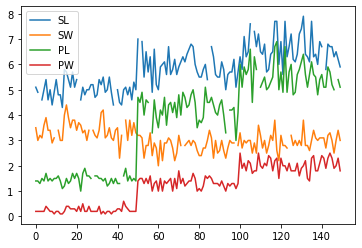

In [ ]:
data.drop('Classification', axis=1).plot()

Since the features containing the missing values are of float type and no much variation, we fill those missing values with the respective mean of the columns.

## Filling the missing value of 'SL'

In [ ]:
# Locating the indices containing the missing values in 'SL'.

data[data['SL'].isna()].index

Int64Index([2, 21, 39, 51, 85, 106, 141], dtype='int64')

In [ ]:
# Extracting those indices.

data.iloc[[2, 21, 39, 51, 85, 106, 141]]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [ ]:
# Filling the missing values with mean.

data['SL'] = data['SL'].fillna(data['SL'].mean())

In [ ]:
# checking whether the values got filled.

data.iloc[[2, 21, 39, 51, 85, 106, 141]]

,SL,SW,PL,PW,Classification
2,5.855944,3.2,1.3,0.2,Iris-setosa
21,5.855944,3.7,1.5,0.4,Iris-setosa
39,5.855944,3.4,1.5,0.2,Iris-setosa
51,5.855944,3.2,4.5,1.5,Iris-versicolor
85,5.855944,3.4,4.5,1.6,Iris-versicolor
106,5.855944,2.5,4.5,1.7,Iris-virginica
141,5.855944,3.1,5.1,2.3,Iris-virginica


## Filling the missing values of 'SW'.

In [ ]:
# Locating the indices containing the missing values in 'SW'.

data[data.SW.isna()].index

Int64Index([10, 27, 43, 72, 98, 124], dtype='int64')

In [ ]:
# Extracting those indices.

data.iloc[[10, 27, 43, 72, 98, 124]]

,SL,SW,PL,PW,Classification
10,5.4,NaN,1.5,0.2,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
72,6.3,NaN,4.9,1.5,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor
124,6.7,NaN,5.7,2.1,Iris-virginica


In [ ]:
# Filling the missing values with mean.

data['SW'] = data['SW'].fillna(data['SW'].mean())

In [ ]:
# Checking whether the values got filled.

data.iloc[[10, 27, 43, 72, 98, 124]]

,SL,SW,PL,PW,Classification
10,5.4,3.049306,1.5,0.2,Iris-setosa
27,5.2,3.049306,1.5,0.2,Iris-setosa
43,5.0,3.049306,1.6,0.6,Iris-setosa
72,6.3,3.049306,4.9,1.5,Iris-versicolor
98,5.1,3.049306,3.0,1.1,Iris-versicolor
124,6.7,3.049306,5.7,2.1,Iris-virginica


## Filling the missing values of 'PL'.

In [ ]:
# Locating the indices containing the missing values in 'PL'.

data[data.PL.isna()].index

Int64Index([28, 42, 56, 94, 109, 147], dtype='int64')

In [ ]:
# Extracting those indices.

data.iloc[[28, 42, 56, 94, 109, 147]]

,SL,SW,PL,PW,Classification
28,5.2,3.4,NaN,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
56,6.3,3.3,NaN,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
109,7.2,3.6,NaN,2.5,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


In [ ]:
# Filling the missing values with mean.

data['PL'] = data['PL'].fillna(data.PL.mean())

In [ ]:
# Checking whether the values got filled.

data.iloc[[28, 42, 56, 94, 109, 147]]

,SL,SW,PL,PW,Classification
28,5.2,3.4,3.75625,0.2,Iris-setosa
42,4.4,3.2,3.75625,0.2,Iris-setosa
56,6.3,3.3,3.75625,1.6,Iris-versicolor
94,5.6,2.7,3.75625,1.3,Iris-versicolor
109,7.2,3.6,3.75625,2.5,Iris-virginica
147,6.5,3.0,3.75625,2.0,Iris-virginica


# Encoding

In [ ]:
# Label encoding using sklearn.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)
data.head()

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Building Models

## Splitting the models

In [ ]:
x = pd.DataFrame(data.drop('Classification', axis=1))
y = pd.DataFrame(data['Classification'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training the model.

logit = LogisticRegression(max_iter=200)
logit.fit(x_train, np.ravel(y_train))

LogisticRegression(max_iter=200)

In [ ]:
# Testing the model.

y_pred = logit.predict(x_test)

In [ ]:
# Evaluating the performance of the model.

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print('Training accuracy of the model: ', logit.score(x_train, y_train))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average = 'macro'))
print('Recall is: ', recall_score(y_test, y_pred, average = 'macro'))
print('f1 score is: ', f1_score(y_test, y_pred, average = 'macro'))

Training accuracy of the model:  0.95
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

No missclassifications in predicting the target variable (100% accuracy is achieved in the prediction), eventhough the training accuracy of the model is 95%.

## KNN

In [ ]:
# Finding the appropriate k value.

from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  knn.fit(x_train, np.ravel(y_train))
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

In [ ]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

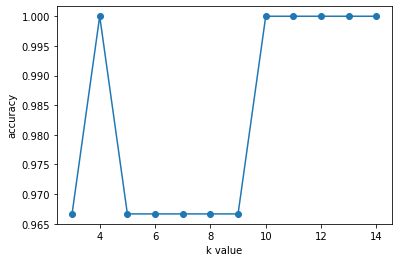

In [ ]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
# Training the model.

knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn.fit(x_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Testing the model.

y_pred = knn.predict(x_test)

In [ ]:
# Evaluating the performance of the model.

print('Training accuracy of the model: ', knn.score(x_train, y_train))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average = 'macro'))
print('Recall is: ', recall_score(y_test, y_pred, average = 'macro'))
print('f1 score is: ', f1_score(y_test, y_pred, average = 'macro'))

Training accuracy of the model:  0.9583333333333334
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

No missclassifications in predicting the target variable (100% accuracy is achieved in the prediction), eventhough the training accuracy of the model is 95.8%.

## SVM

In [ ]:
# Training the model.

from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, np.ravel(y_train))

SVC(kernel='linear')

In [ ]:
# Testing the model.

y_pred = svm_linear.predict(x_test)

In [ ]:
# Evaluating the performance of the model.

print('Training accuracy of the model: ', svm_linear.score(x_train, y_train))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average = 'macro'))
print('Recall is: ', recall_score(y_test, y_pred, average = 'macro'))
print('f1 score is: ', f1_score(y_test, y_pred, average = 'macro'))

Training accuracy of the model:  0.9666666666666667
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

No missclassifications in predicting the target variable (100% accuracy is achieved in the prediction), eventhough the training accuracy of the model is 96.66%.

## Decision Tree

In [ ]:
# training the model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# testing the model

y_pred = dt.predict(x_test)

In [ ]:
print('Training accuracy of the model: ', dt.score(x_train, y_train))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall is: ', recall_score(y_test, y_pred, average = 'weighted'))
print('f1 score is: ', f1_score(y_test, y_pred, average = 'weighted'))

Training accuracy of the model:  1.0
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

No missclassifications in predicting the target variable (100% accuracy is achieved in the prediction). Also the training accuracy of the model is 100%. 

## Random Forest

In [ ]:
# training the model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, np.ravel(y_train))


RandomForestClassifier()

In [ ]:
# testing the model

y_pred = rf.predict(x_test)

In [ ]:
print('Training accuracy of the model: ', rf.score(x_train, y_train))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall is: ', recall_score(y_test, y_pred, average = 'weighted'))
print('f1 score is: ', f1_score(y_test, y_pred, average = 'weighted'))

Training accuracy of the model:  1.0
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

No missclassifications in predicting the target variable (100% accuracy is achieved in the prediction). Also the training accuracy of the model is 100%.

# Feature Importance

In [ ]:
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

PW    46.536318
PL    39.154402
SL    10.972324
SW     3.336957
dtype: float64

# Conclusion.

Based on the performance score of different models tried over here, Decision tree and Random Forest Classifier can be cosidered the best for this particular dataset.